# Finance Data Project 

This data project focuses on exploratory data analysis of stock prices. Keep in mind, this project is just meant to showcase visualization and pandas skills for the module requirements, it is not meant to be a robust financial analysis or be taken as financial advice.
____
The main focus is on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Getting the Data

All data will be accessed and read directly from from Google finance using pandas.


In [4]:
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Using pandas datareader, We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [5]:
yfin.pdr_override()
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)


In [6]:
# Bank of America
BAC = pdr.get_data_yahoo('BAC', start, end)

# CitiGroup
C = pdr.get_data_yahoo("C", start, end)

# Goldman Sachs
GS = pdr.get_data_yahoo("GS", start, end)

# JPMorgan Chase
JPM = pdr.get_data_yahoo("JPM", start, end)

# Morgan Stanley
MS = pdr.get_data_yahoo("MS", start, end)

# Wells Fargo
WFC = pdr.get_data_yahoo("WFC", start, end)

c:\Users\omar\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
c:\Users\omar\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
c:\Users\omar\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed
c:\Users\omar\AppData\Local\Programs\Python\Python312\L

In [7]:
# Could also do this for a Panel Object
df = pdr.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

[*********************100%%**********************]  6 of 6 completed

6 Failed downloads:
['JPM', 'GS', 'WFC', 'BAC', 'MS', 'C']: ValueError("time data 'google' does not match format '%Y-%m-%d'")


**Creating a list of the ticker symbols (as strings) in alphabetical order**

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Concatenating the bank dataframes together to a single data frame called bank_stocks. Also Setting the keys argument equal to the tickers list**

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Setting the column name levels**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Checking the head of the bank_stocks dataframe**

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.168701  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.827055  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.868052  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.820223  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.840736  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.585453  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.608498  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.700638  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.735214  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.092316  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.369596  11016400  
2006-01-04   31.530001  19.144928  10870000  
2006-01-05   31.495001  19.123674  10158000  
2006-01-06   31.680000  19.236006   8403800  
2006-01-09   31.674999  19.232981   5619600  

[5 rows x 36 columns]

# EDA


**As usual checking extreme cases first by checking the max Close price for each bank's stock throughout the time period**

In [12]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock**

In [13]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value**

In [14]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Creating a pairplot using seaborn of the returns dataframe. This is done to see which stock stands out & why**

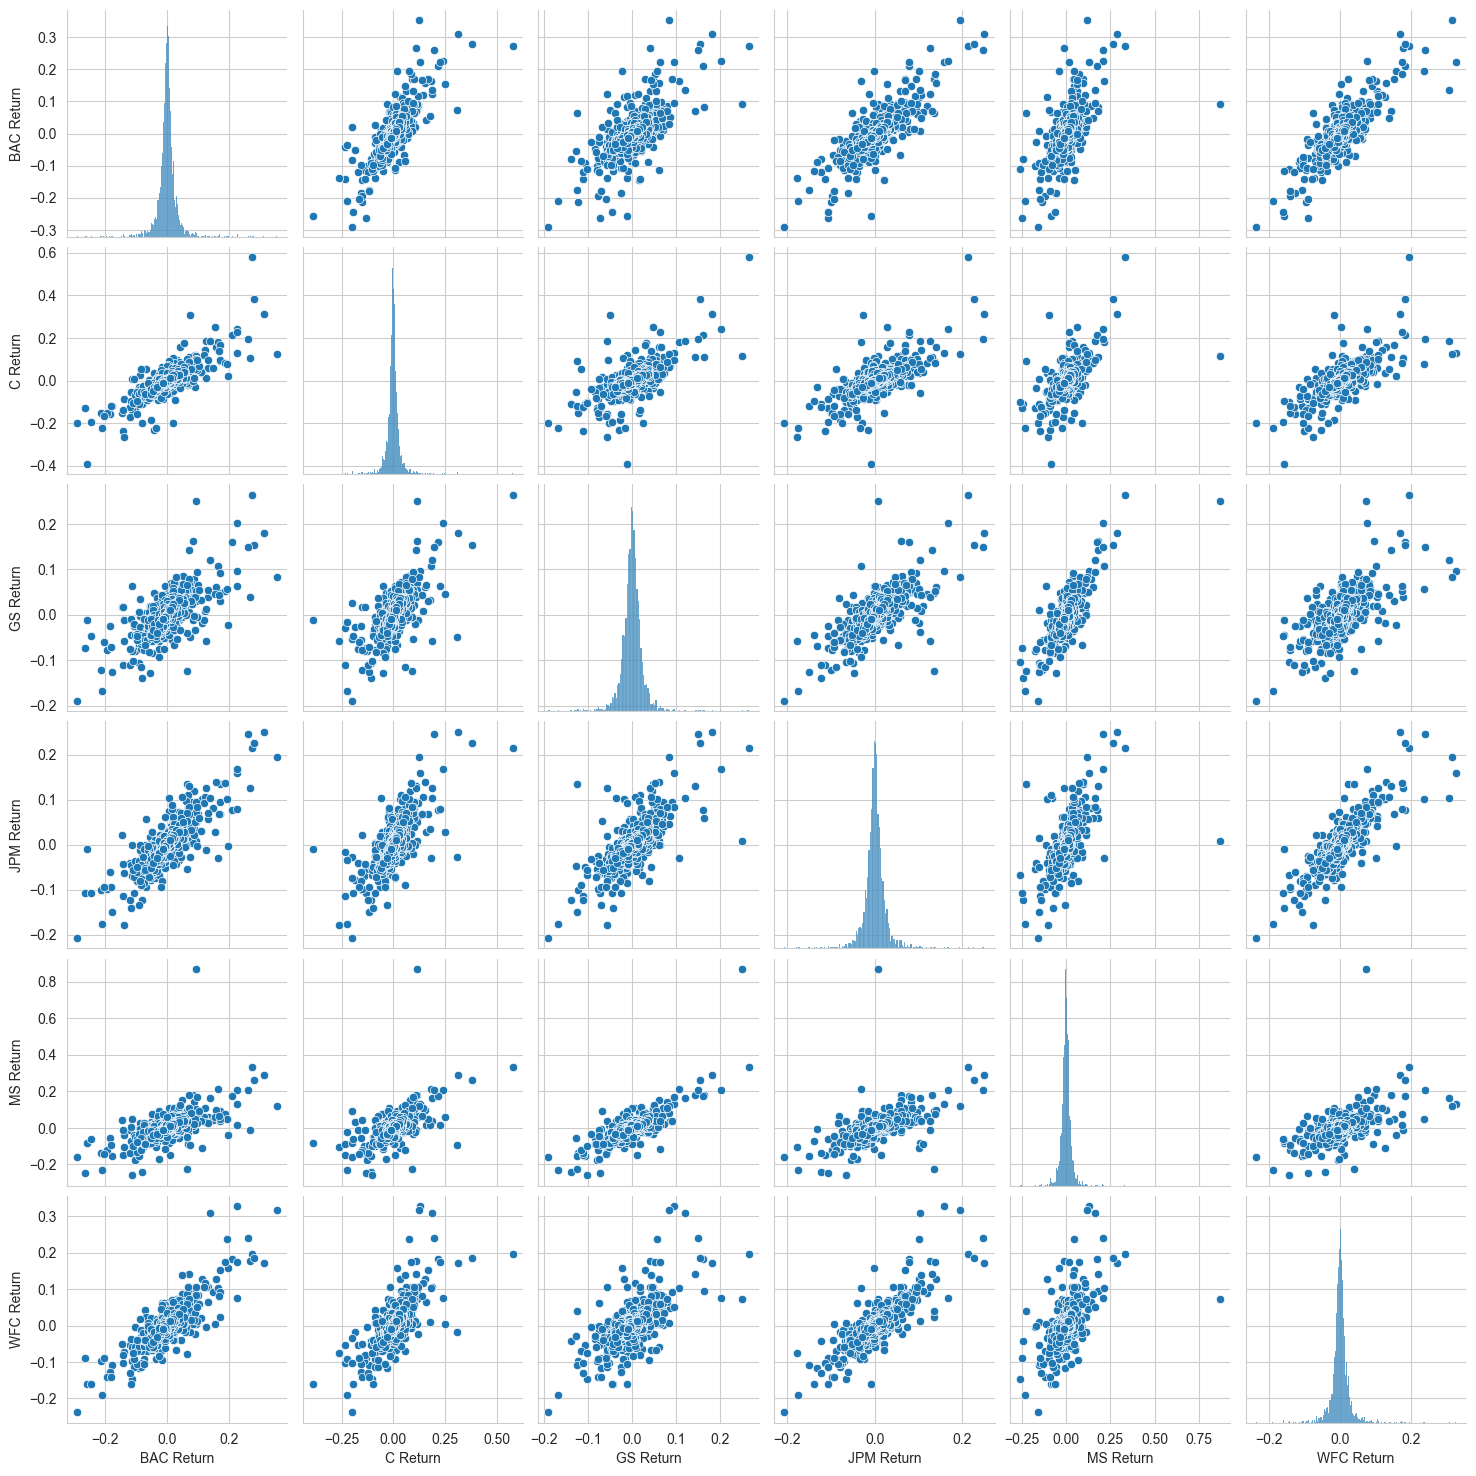

In [15]:
#returns[1:]
import seaborn as sns
%matplotlib inline
import scipy
sns.pairplot(returns[1:])

**Using this returns DataFrame, Allows us to see what dates each bank stock had the best and worst single day returns. It is noticed that 4 of the banks share the same day for the worst drop**

In [16]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**It is to be noted that Citigroup's largest drop and biggest gain were very close to one another**

In [17]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Taking a look at the standard deviation of the returns, this allows us to know which stock would be classified as the riskiest over the entire time period, and Which would be classified as the riskiest for the year 2015**

In [18]:
returns.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [19]:
start_date = pd.Timestamp('2015-01-01')
end_date = pd.Timestamp('2015-12-31')
subset_returns = returns.loc[start_date :end_date] # Very similar risk profiles, but Morgan Stanley or BofA
std_dev = subset_returns.std()
print(std_dev)

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64


**Creating a distplot using seaborn of the 2015 returns for Morgan Stanley**

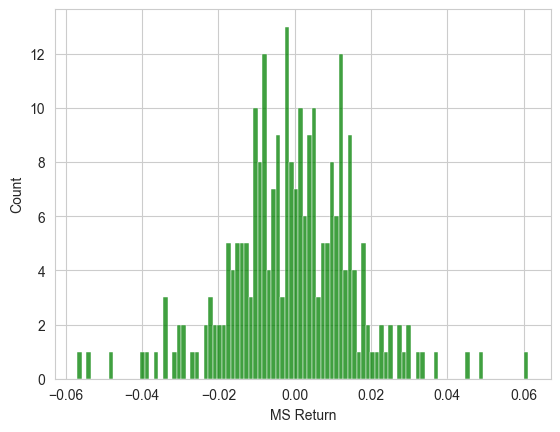

In [20]:
start_date = '2015-01-01'
end_date = '2015-12-31'

# Use loc for indexing
subset_returns = returns.loc[start_date:end_date]

# Plot the distribution using sns.histplot (distplot is deprecated)
sns.histplot(subset_returns['MS Return'], color='green', bins=100)

# Show the plot
plt.show()

**Creating a distplot using seaborn of the 2008 returns for CitiGroup**

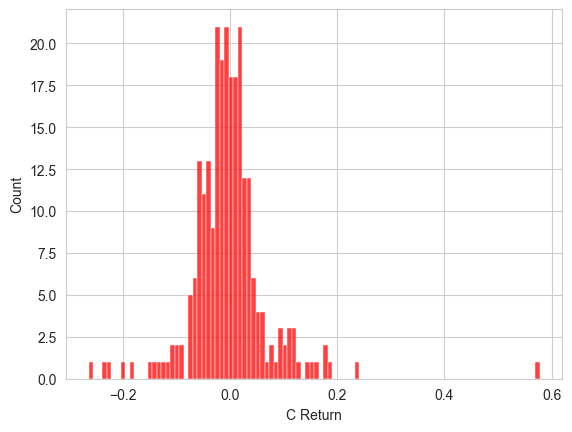

In [21]:
start_date = '2008-01-01'
end_date = '2008-12-31'

# Use loc for indexing
subset_returns = returns.loc[start_date:end_date]

# Plot the distribution using sns.histplot (distplot is deprecated)
sns.histplot(subset_returns['C Return'], color='red', bins=100)

# Show the plot
plt.show()

____
# More Visualization


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Creating a line plot showing Close price for each bank for the entire index of time**

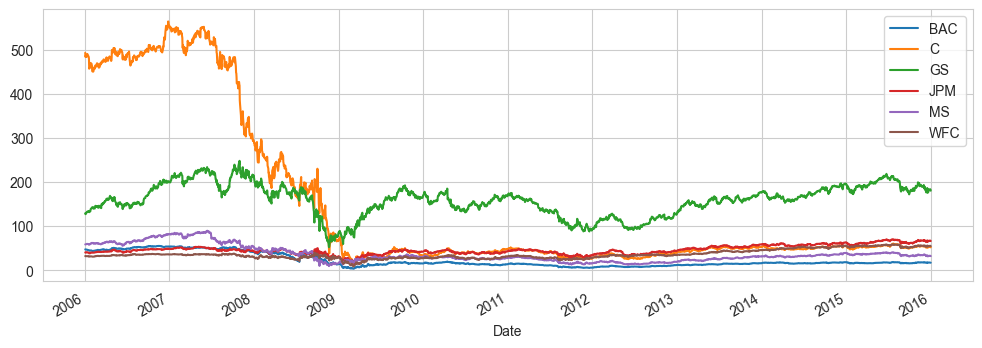

In [23]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

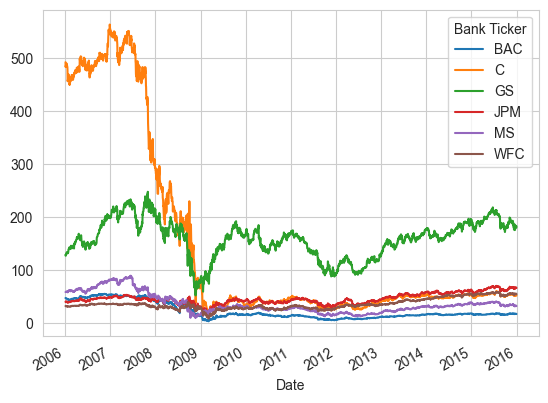

In [24]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

<Axes: xlabel='Date'>

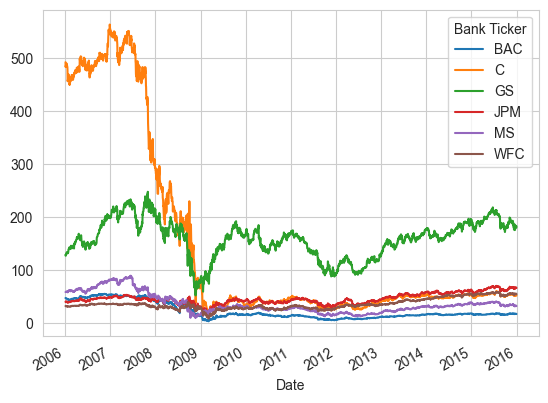

In [25]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

## Moving Averages

Analyze the moving averages for these stocks in the year 2008. 

**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

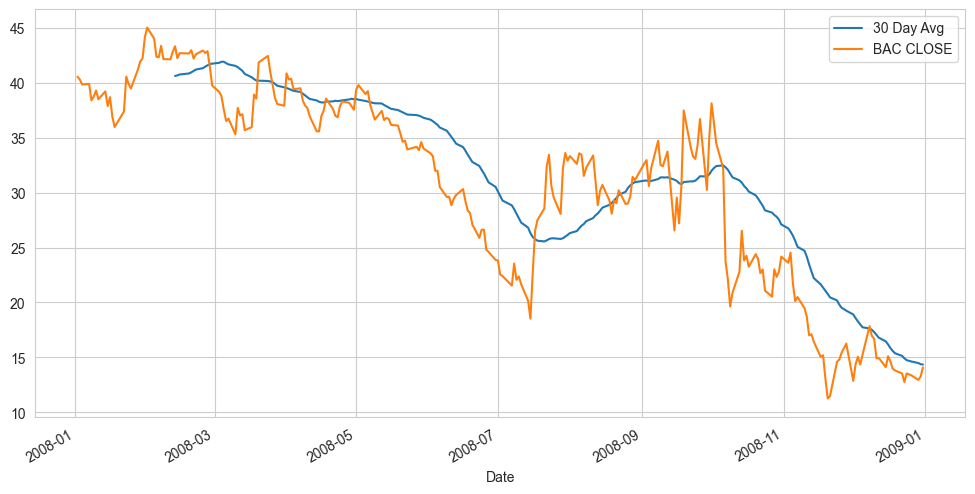

In [26]:
import matplotlib.pyplot as plt

# Assuming 'BAC' is a DataFrame with a DatetimeIndex and 'Close' is a column
# Convert string dates to Timestamp objects
start_date = '2008-01-01'
end_date = '2009-01-01'

# Use loc for indexing
subset_BAC = BAC.loc[start_date:end_date]

# Plotting
plt.figure(figsize=(12, 6))
subset_BAC['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
subset_BAC['Close'].plot(label='BAC CLOSE')
plt.legend()
plt.show()


**Creating a heatmap of the correlation between the stocks Close Price**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

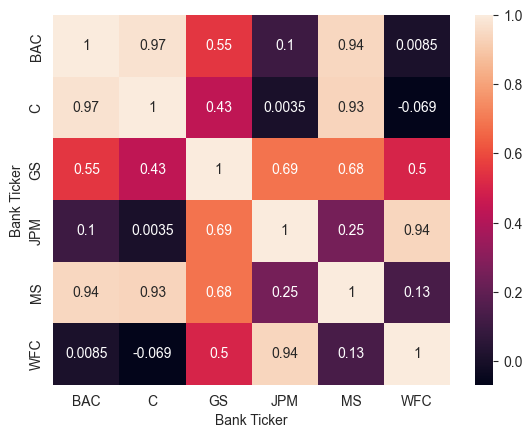

In [27]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Using seaborn's clustermap to cluster the correlations together (this is not necessery however useful to be displayed for examination purposes)**

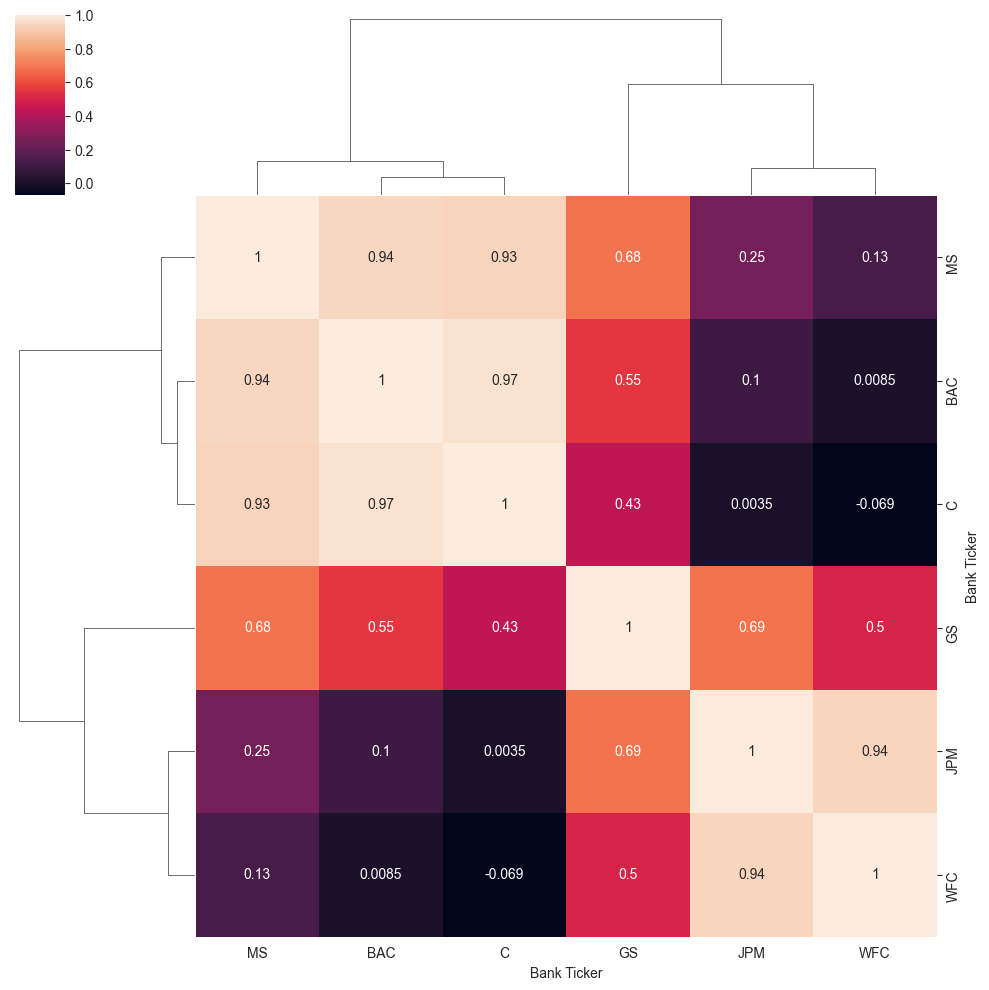

In [28]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, method='average', row_cluster=True, col_cluster=True)


In [29]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Technical Analysis graph

Using cufflinks library to create some Technical Analysis plots.

**Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [31]:

# Convert string dates to Timestamp objects
start_date = '2015-01-01'
end_date = '2016-01-01'

# Use loc for indexing
subset_BAC = BAC.loc[start_date:end_date]

# Plot candlestick chart using Cufflinks
subset_BAC[['Open', 'High', 'Low', 'Close']].iplot(kind='candle', title='Candlestick Chart')


** Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

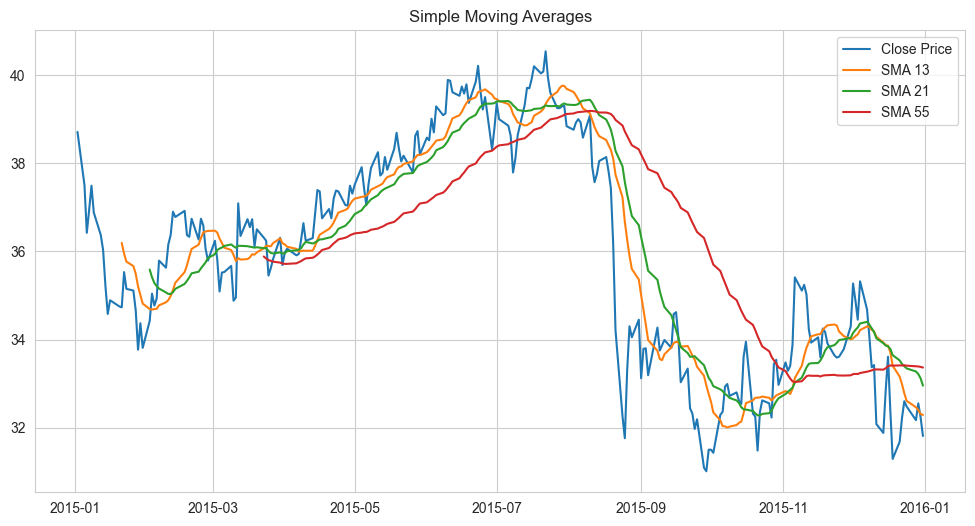

In [36]:
start_date = '2015-01-01'
end_date = '2016-01-01'

# Use loc for indexing
subset_MS = MS.loc[start_date:end_date]

# Calculate SMAs
subset_MS['sma_13'] = subset_MS['Close'].rolling(window=13).mean()
subset_MS['sma_21'] = subset_MS['Close'].rolling(window=21).mean()
subset_MS['sma_55'] = subset_MS['Close'].rolling(window=55).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(subset_MS['Close'], label='Close Price')
plt.plot(subset_MS['sma_13'], label='SMA 13')
plt.plot(subset_MS['sma_21'], label='SMA 21')
plt.plot(subset_MS['sma_55'], label='SMA 55')

plt.title('Simple Moving Averages')
plt.legend()
plt.show()


**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [30]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')